# 1- Intro...

we're going to make some analysis and visualizations of the BigMart sales data to know the current situation and and see if there's any helpful pattern also see if there's anything unusual.
then we'll build a model that using this model, BigMart will try to understand the properties of products and stores which play a key role in increasing sales.

In [1]:
# import libraries
import os
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
% matplotlib inline
from IPython.display import Image
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

C:\Users\ahmed\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d
C:\Users\ahmed\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:34: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  from ._gradient_boosting import predict_stages
C:\Users\ahmed\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:34: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will 

In [2]:
#read data
train = pd.read_csv('D:\Work\Technolabs internship\Lec1 (intro)\Task1/Train.csv')
test = pd.read_csv('D:\Work\Technolabs internship\Lec1 (intro)\Task1/Test.csv')

# 2- EDA

In [3]:
print('Train data head:-\n\n', train.head(),'\n\n------------------\n\nTest data head:-\n\n',test.head())

Train data head:-

   Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
0           FDA15         9.30          Low Fat         0.016047   
1           DRC01         5.92          Regular         0.019278   
2           FDN15        17.50          Low Fat         0.016760   
3           FDX07        19.20          Regular         0.000000   
4           NCD19         8.93          Low Fat         0.000000   

               Item_Type  Item_MRP Outlet_Identifier  \
0                  Dairy  249.8092            OUT049   
1            Soft Drinks   48.2692            OUT018   
2                   Meat  141.6180            OUT049   
3  Fruits and Vegetables  182.0950            OUT010   
4              Household   53.8614            OUT013   

   Outlet_Establishment_Year Outlet_Size Outlet_Location_Type  \
0                       1999      Medium               Tier 1   
1                       2009      Medium               Tier 3   
2                       1999      Mediu

In [4]:
#let's take a quick look on the data...
print('Train shape: ', train.shape,'\n\n ------------------\n\n', 'Test shape: ', test.shape, '\n\n------------------\n\ntrain Describtion:- \n\n', train.describe(),'\n------------------\n\n train\'s quick look:-\n\n', train.info )

Train shape:  (8523, 12) 

 ------------------

 Test shape:  (5681, 11) 

------------------

train Describtion:- 

        Item_Weight  Item_Visibility     Item_MRP  Outlet_Establishment_Year  \
count  7060.000000      8523.000000  8523.000000                8523.000000   
mean     12.857645         0.066132   140.992782                1997.831867   
std       4.643456         0.051598    62.275067                   8.371760   
min       4.555000         0.000000    31.290000                1985.000000   
25%       8.773750         0.026989    93.826500                1987.000000   
50%      12.600000         0.053931   143.012800                1999.000000   
75%      16.850000         0.094585   185.643700                2004.000000   
max      21.350000         0.328391   266.888400                2009.000000   

       Item_Outlet_Sales  
count        8523.000000  
mean         2181.288914  
std          1706.499616  
min            33.290000  
25%           834.247400  
50%     

In [5]:
# we'll work on the train data so let's focus on it...
df = train

In [6]:
df.sample()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
8391,FDV15,10.3,LF,0.146172,Meat,103.3648,OUT046,1997,Small,Tier 1,Supermarket Type1,3219.8088


In [7]:
# Exploring nulls in the data
null_count = df.isnull().sum()
null_count

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [8]:
# Exploring the unique values in every feature
for i in df:
    print(f'the unique values of (( {i} )):\n\n', df[i].unique(),('\n-------------------------\n'))

the unique values of (( Item_Identifier )):

 ['FDA15' 'DRC01' 'FDN15' ... 'NCF55' 'NCW30' 'NCW05'] 
-------------------------

the unique values of (( Item_Weight )):

 [ 9.3    5.92  17.5   19.2    8.93  10.395 13.65     nan 16.2   11.8
 18.5   15.1   17.6   16.35   9.    13.35  18.85  14.6   13.85  13.
  7.645 11.65   5.925 19.25  18.6   18.7   17.85  10.     8.85   9.8
 13.6   21.35  12.15   6.42  19.6   15.85   7.39  10.195  9.895 10.895
  7.905  9.195  8.365  7.97  17.7   19.35   8.645 15.6   18.25   7.855
  7.825  8.39  12.85  19.     5.905  7.76  16.75  15.5    6.055  6.305
 20.85  20.75   8.895 19.7    8.75  13.3    8.31  19.75  17.1   10.5
  6.635 14.15   8.89   9.1    7.5   16.85   7.485 11.6   12.65  20.25
  8.6   12.6    8.88  20.5   13.5    7.235  6.92   8.02  12.8   16.6
 14.    16.    21.25   7.365 18.35   5.465  7.27   6.155 19.5   15.2
 14.5   13.1   12.3   11.1   11.3    5.75  11.35   6.525 10.3    5.78
 11.85  18.75   5.26  16.1    9.5   13.8   14.65   6.67   6.11  

In [9]:
# we can see that there's a duplicated unique values in "Item_Fat_Content" so we have to standarize the names..
# we'll replace 'low fat' and 'LF' with 'Low Fat', and 'reg' with 'Regular'
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace(['low fat', 'LF'], 'Low Fat')
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace('reg', 'Regular')

print(df['Item_Fat_Content'].unique())

['Low Fat' 'Regular']


In [10]:
# I see null values in Outlet_Size feature so let's take a look on it
nulls = df['Outlet_Size'].isnull().sum()
print('nulls number = ', nulls,'\n\n', 'nulls percentage = ', nulls/len(df['Outlet_Size'])*100,'%' )

nulls number =  2410 

 nulls percentage =  28.27642848762173 %


In [11]:
# Let's see how'll we handle it...
# First let's check the nulls in the test data too to see if that's normal
null_count = test.isnull().sum()
null_count

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

### Handling Null Values
##### 'Item_Weight'
Since 'Item_Weight' is a numerical column, we have several options:

- Imputation with Mean/Median

- Predictive Imputation (using ML)

- Group-Based Imputation (using a related variable's mean)



##### 'Outlet_Size'

Handling Null Values in 'Outlet_Size'
'Outlet_Size' is a categorical variable, so the strategies are different:

- Mode Imputation

- Predictive Imputation (using ML)

- Create a New Category (replace with string value)

- Relationship-Based Imputation (using a related variable)

In [12]:
'''
I see the best way to handle the null data will be using ML models to predict them depending on the related variables, but..
as I really have no time now beside that I hate to add values depending on the guessing,
so I'd love to replace the null values of 'Outlet_Size' with string ('Unknown'),
And for 'Item_Weight' I'll use the mean 
'''
# Assuming df_train and df_test are your training and testing dataframes respectively
# Replace null values in 'Outlet_Size' with 'Unknown' in both datasets
df['Outlet_Size'].fillna('Unknown', inplace=True)
test['Outlet_Size'].fillna('Unknown', inplace=True)

# Calculate the mean of 'Item_Weight' from the training set
mean_item_weight = df['Item_Weight'].mean()

# Replace null values in 'Item_Weight' with the mean in both datasets
df['Item_Weight'].fillna(mean_item_weight, inplace=True)
test['Item_Weight'].fillna(mean_item_weight, inplace=True)

In [13]:
# Let's see how'll we handle it...
# First let's check the nulls in the test data too to see if that's normal
df_null_count = test.isnull().sum()
test_null_count = test.isnull().sum()
print (df_null_count,'\n\n', test_null_count)

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
dtype: int64 

 Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
dtype: int64


In [14]:
#Checking the data formates:-
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [15]:
# checking if there's any duplicated rows
duplicated_rows = df[df.duplicated()] 
len(duplicated_rows[:])

0

In [16]:
# Save the progress 
# df.to_csv('df1_train.csv', index=False)

# 3- Data Visualization

I'd love to visualize some data it'll be very helpful  for the stakeholder in the business beside it'll give us some hints too...
I'll use Power BI cuz I'm faster with it and I have no time

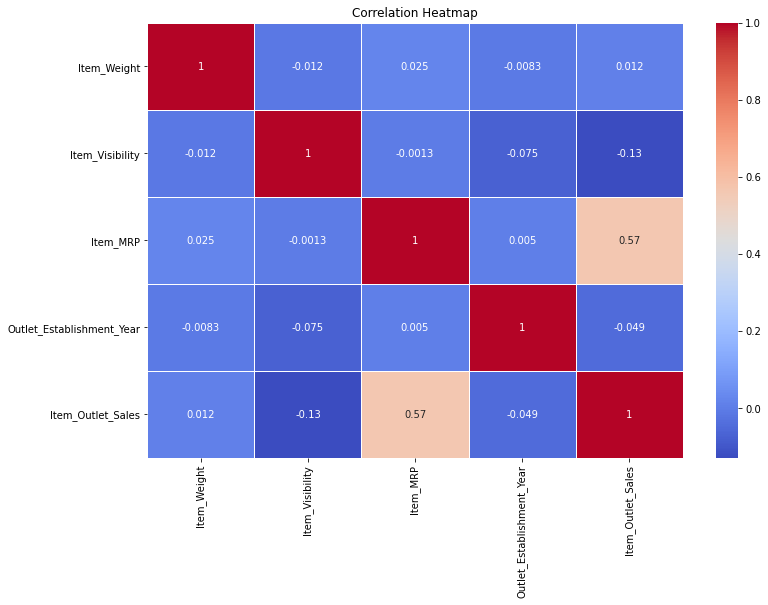

In [17]:
# Before the visualization I want to take a look on the correlation of the data...

plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()

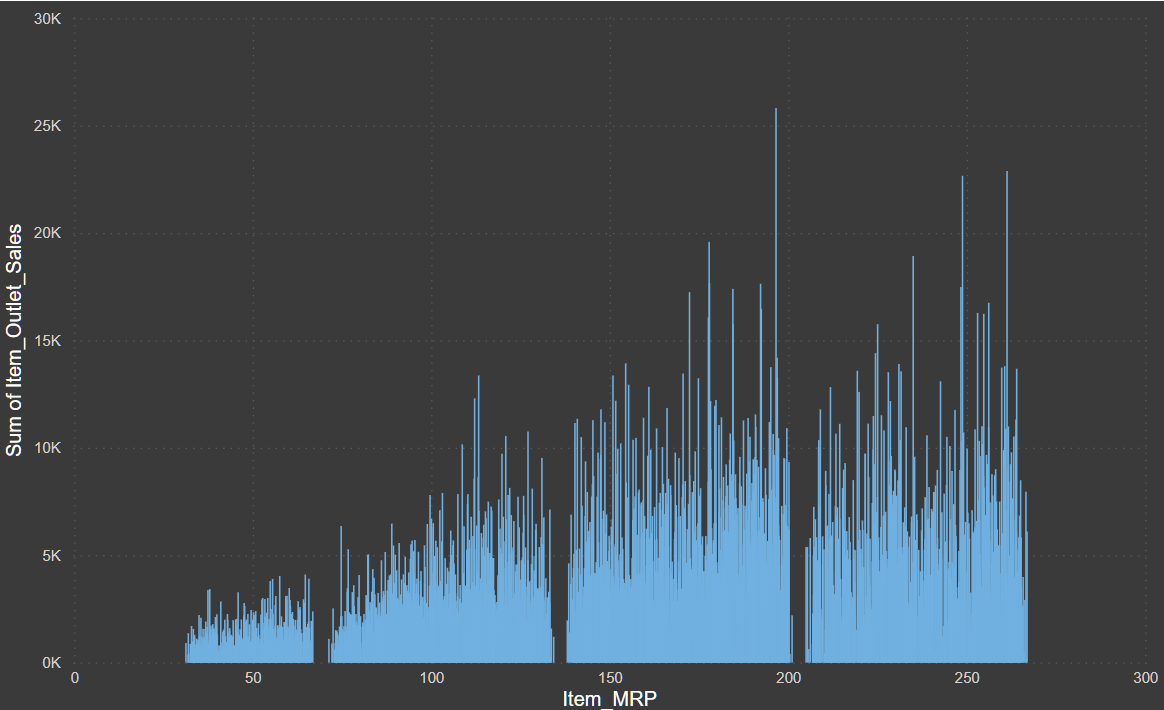

In [18]:
# let's start with taking a look on that relationship between : Item MRP vs Outlet_Sales
Image(filename='D:\Work\Technolabs internship\Lec1 (intro)\Task1\MRPvsOutlet_Sales.png')


The percentages due Items:-



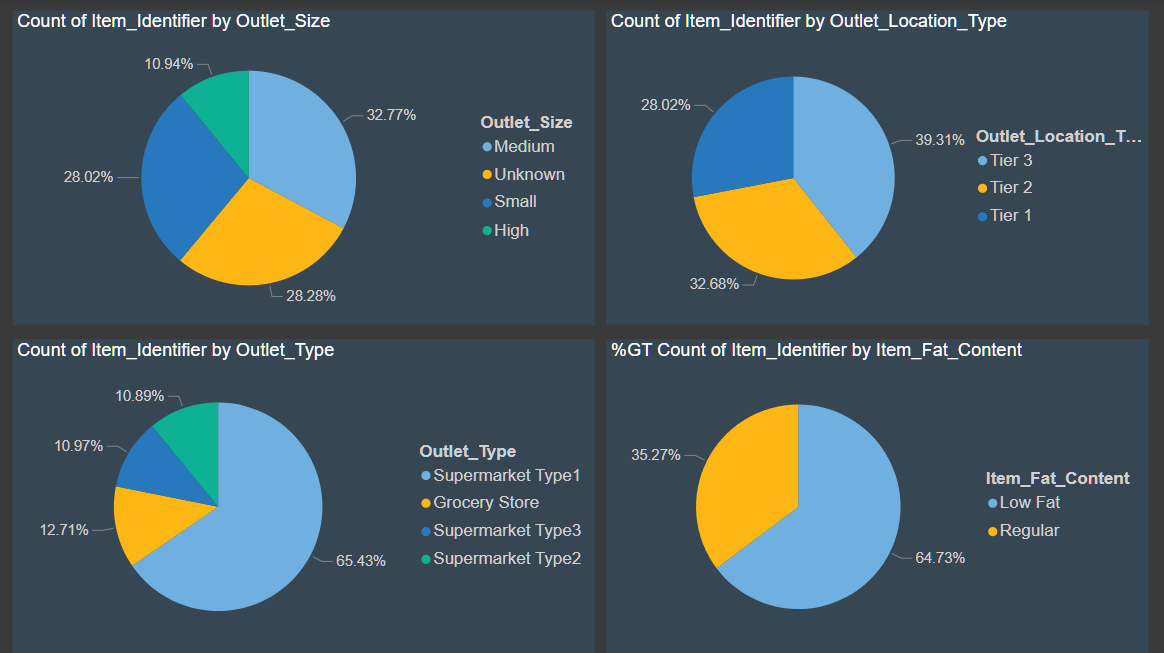

In [19]:
print('\nThe percentages due Items:-\n')

Image(filename='D:\Work\Technolabs internship\Lec1 (intro)\Task1\percentages_due_Items.png')


The percentages due Sales:-



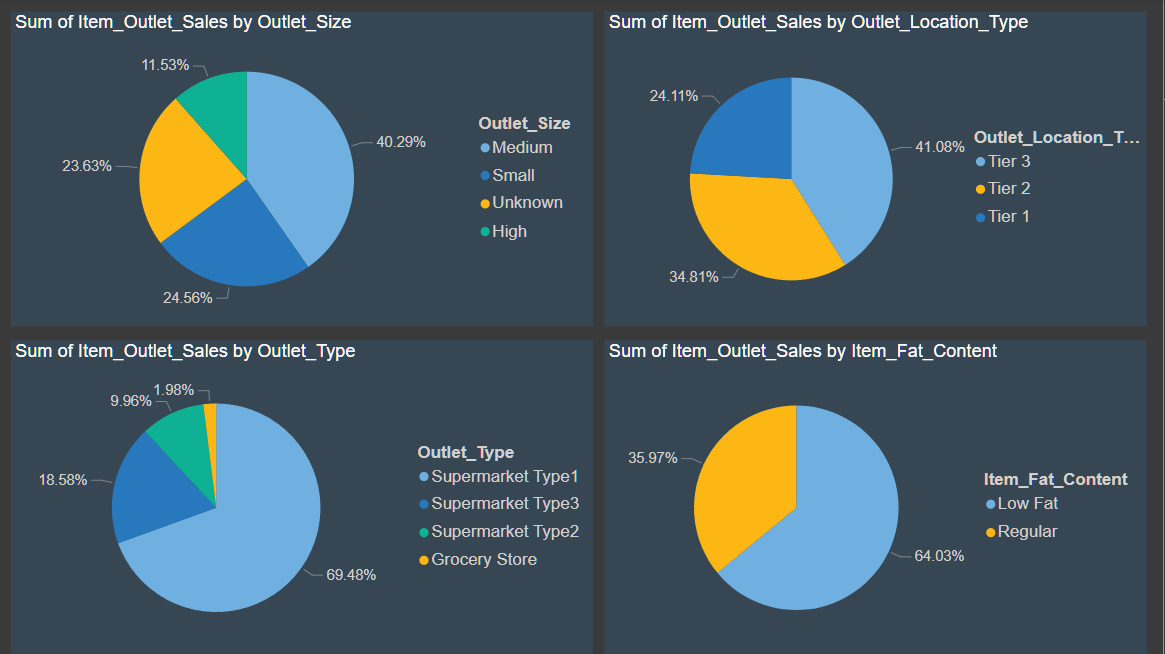

In [20]:
print('\nThe percentages due Sales:-\n')
Image(filename='D:\Work\Technolabs internship\Lec1 (intro)\Task1\percentages_due_Sales.png')

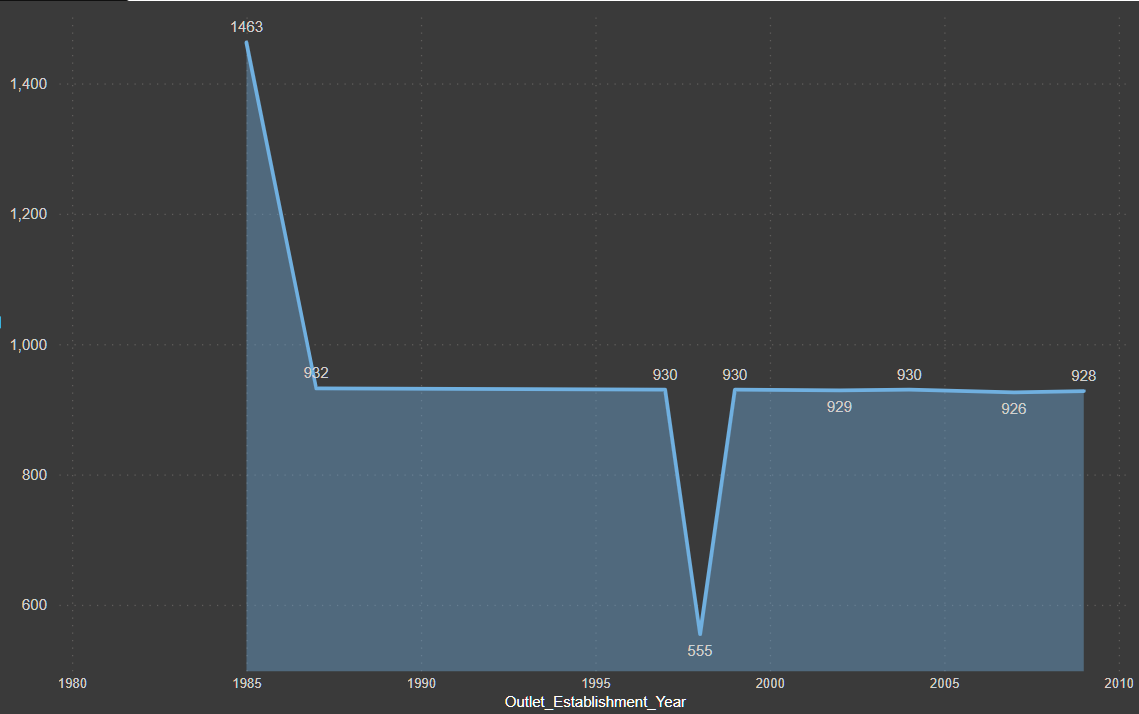

In [21]:
Image(filename='D:\Work\Technolabs internship\Lec1 (intro)\Task1\Outlet_year.png')

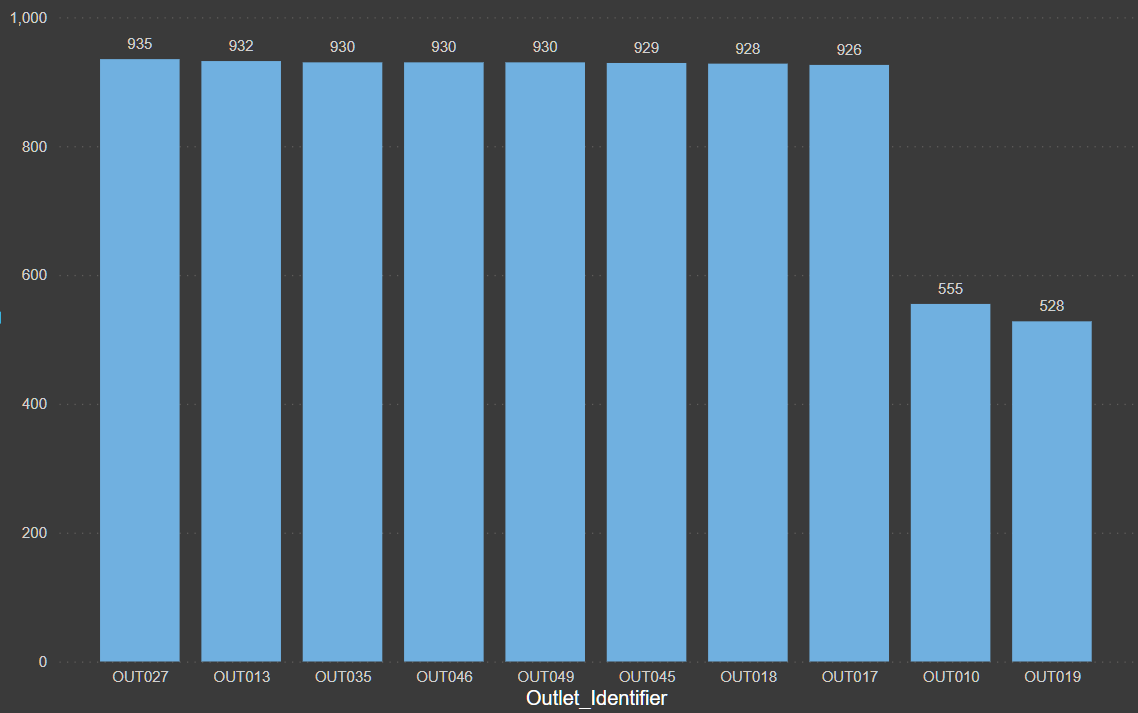

In [22]:
Image(filename='D:\Work\Technolabs internship\Lec1 (intro)\Task1\Outlet_identifiers.png')

# 4- prepare the data for the ML model...


We'll take a look on Outliers & Skewness & Scales

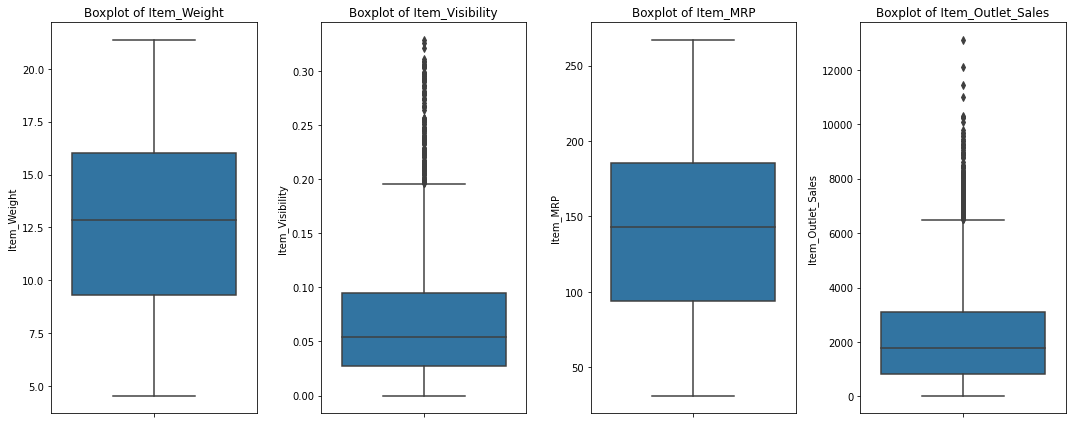

In [23]:
# Let's create a boxplot for numerical features to visualize outliers
numerical_features = ['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Item_Outlet_Sales']

plt.figure(figsize=(15, 6))
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(1, len(numerical_features), i)
    sns.boxplot(y=df[feature])
    plt.title(f'Boxplot of {feature}')

plt.tight_layout()
plt.show()


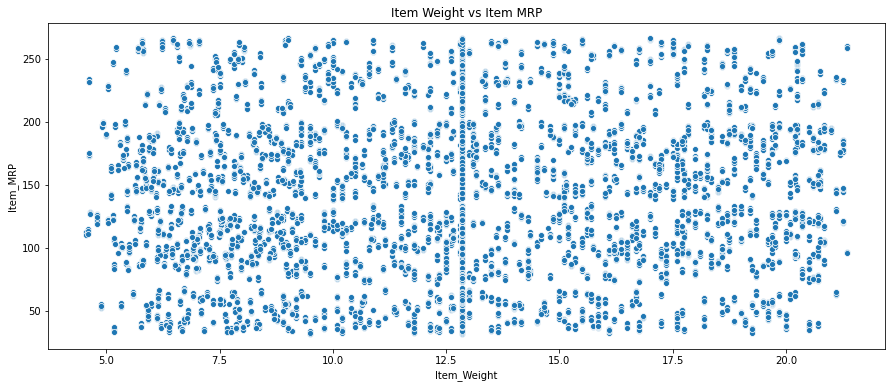

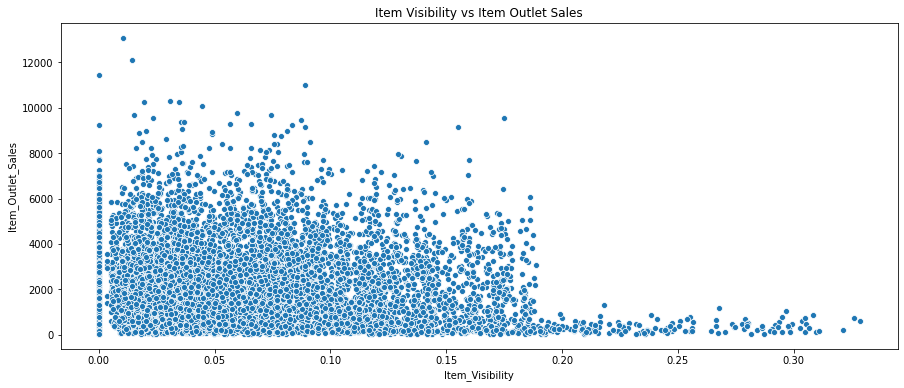

In [24]:
# For feature scales, we typically do scatter plots to visualize the relationship between features
# Here, we'll just do a few pair-wise scatter plots as an example
plt.figure(figsize=(15, 6))
sns.scatterplot(data=df, x='Item_Weight', y='Item_MRP')
plt.title('Item Weight vs Item MRP')
plt.show()

plt.figure(figsize=(15, 6))
sns.scatterplot(data=df, x='Item_Visibility', y='Item_Outlet_Sales')
plt.title('Item Visibility vs Item Outlet Sales')
plt.show()


#### - Item Visibility vs Item Outlet Sales:-
The scatter plot does not show a clear linear relationship, and higher visibility does not necessarily lead to higher sales, which aligns with the low correlation seen earlier.
#### - Item Weight vs Item MRP:-
This scatter plot confirms that there is no apparent relationship between 'Item_Weight' and 'Item_MRP', indicating that the weight of an item does not influence its retail price.

C:\Users\ahmed\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


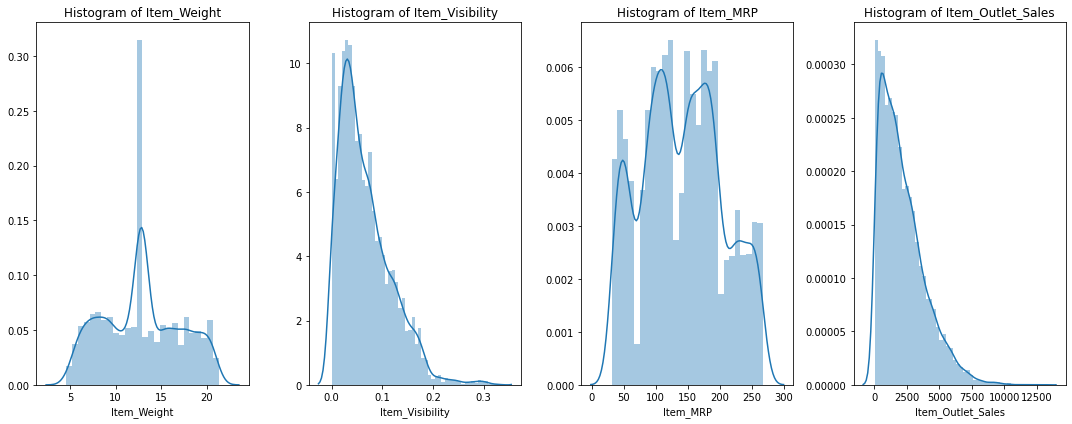

In [25]:
# Let's create histograms for numerical features to visualize skewness
plt.figure(figsize=(15, 6))
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(1, len(numerical_features), i)
    sns.distplot(df[feature], kde=True, hist=True)
    plt.title(f'Histogram of {feature}')

plt.tight_layout()
plt.show()


In [26]:
df_new=df

# Handling Skewness...
# Adjust zero values in 'Item_Visibility'
df_new['Item_Visibility'] = df_new['Item_Visibility'].replace(0, np.nan)
df_new['Item_Visibility'].fillna(df_new['Item_Visibility'].mean(), inplace=True)  # Replace NaNs with the mean

# Apply logarithmic transformation to 'Item_Visibility' and 'Item_Outlet_Sales' 
df_new['Item_Visibility'] = np.log(df_new['Item_Visibility'])
df_new['Item_Outlet_Sales'] = np.log(df_new['Item_Outlet_Sales'] + 1)  # Adding 1 to avoid log(0)


#### Outliers & Scaling...

Although I was thinking about delete the outliers to not effect the model accurecy but instead of that I'll use the random forest and XGBoost models which're not be affected much by the outliers , beside that I think that the  data is real so maybe it'll be helpful in the future.

Also due to the scaling: as I intend to use Random Forest and XGBoost, I'll not need to scale cuz they do not depend on the magnitude of the variables; they rely on the rank ordering of variables.

In [27]:
# Encoding

categorical_features = ['Item_Fat_Content', 'Item_Type', 'Outlet_Identifier', 
                        'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type']

# Perform one-hot encoding on categorical features
df_encoded = pd.get_dummies(df_new, columns=categorical_features)

# Display the first few rows of the new DataFrame to verify
df_encoded

,Item_Identifier,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Type_Baking Goods,Item_Type_Breads,...,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Size_Unknown,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,FDA15,9.300,-4.132215,249.8092,1999,8.225808,1,0,0,0,...,1,0,0,1,0,0,0,1,0,0
1,DRC01,5.920,-3.948780,48.2692,2009,6.096776,0,1,0,0,...,1,0,0,0,0,1,0,0,1,0
2,FDN15,17.500,-4.088756,141.6180,1999,7.648868,1,0,0,0,...,1,0,0,1,0,0,0,1,0,0
3,FDX07,19.200,-2.652400,182.0950,1998,6.597664,0,1,0,0,...,0,0,1,0,0,1,1,0,0,0
4,NCD19,8.930,-2.652400,53.8614,1987,6.903451,1,0,0,0,...,0,0,0,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,-2.868511,214.5218,1987,7.929984,1,0,0,0,...,0,0,0,0,0,1,0,1,0,0
8519,FDS36,8.380,-3.057982,108.1570,2002,6.310436,0,1,1,0,...,0,0,1,0,1,0,0,1,0,0
8520,NCJ29,10.600,-3.347099,85.1224,2004,7.085159,1,0,0,0,...,0,1,0,0,1,0,0,1,0,0
8521,FDN46,7.210,-1.929501,103.1332,2009,7.521100,0,1,0,0,...,1,0,0,0,0,1,0,0,1,0


In [28]:
# We'll do the same to the test data to work on it
# Handle missing values
test_df = test
test_df['Item_Weight'].fillna(mean_item_weight, inplace=True)  # Use the mean from the train set
test_df['Outlet_Size'].fillna('Unknown', inplace=True)  # Or the mode from the train set if that was used

# Handle skewness
# Apply the same transformations for skewness
test_df['Item_Visibility'] = test_df['Item_Visibility'].replace(0, np.nan)
test_df['Item_Visibility'].fillna(test_df['Item_Visibility'].mean(), inplace=True)
test_df['Item_Visibility'] = np.log(test_df['Item_Visibility'])

# One-Hot Encoding
# Use pd.get_dummies and make sure to align the columns with the training data
test_df_encoded = pd.get_dummies(test_df)
test_df_encoded = test_df_encoded.reindex(columns=df_encoded.drop('Item_Outlet_Sales', axis=1).columns, fill_value=0)

# Now test_df_encoded should have the same number of features as df_encoded (excluding 'Item_Outlet_Sales') and can be used for predictions

# Display the first few rows of the new DataFrame to verify
test_df_encoded

,Item_Identifier,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,...,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Size_Unknown,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,0,20.750000,-4.884245,107.8622,1999,1,0,0,0,0,...,1,0,0,1,0,0,0,1,0,0
1,0,8.300000,-3.258977,87.3198,2007,0,0,0,0,0,...,0,0,1,0,1,0,0,1,0,0
2,0,14.600000,-2.306845,241.7538,1998,1,0,0,0,0,...,0,0,1,0,0,1,1,0,0,0
3,0,7.315000,-4.174142,155.0340,2007,1,0,0,0,0,...,0,0,1,0,1,0,0,1,0,0
4,0,12.857645,-2.132005,234.2300,1985,0,1,0,0,0,...,1,0,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5676,0,10.500000,-4.305327,141.3154,1997,0,1,0,0,0,...,0,1,0,1,0,0,0,1,0,0
5677,0,7.600000,-1.944974,169.1448,2009,0,1,0,0,0,...,1,0,0,0,0,1,0,0,1,0
5678,0,10.000000,-2.610081,118.7440,2002,1,0,0,0,0,...,0,0,1,0,1,0,0,1,0,0
5679,0,15.300000,-2.658751,214.6218,2007,0,1,0,0,0,...,0,0,1,0,1,0,0,1,0,0


### Random Forest model

In [29]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np  # Import numpy for square root
import time  # Import time for measuring execution time

# Create a copy of your DataFrame
df_copy = df_encoded.copy()

# Replace "Item_Identifier" with row indices
df_copy['Item_Identifier'] = df_copy.index

# Split the data into features (X) and the target variable (y)
X = df_copy.drop('Item_Outlet_Sales', axis=1)
y = df_copy['Item_Outlet_Sales']

# Split the data into training and validation sets
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)

# Define lists of hyperparameter values to try
n_estimators_values = [50, 100, 150, 200, 250, 300]
max_depth_values = [None, 10, 20, 30, 40, 50]

# Initialize variables to store the best hyperparameters and corresponding metrics
best_hyperparameters = None
best_metrics = {
    'mae': float('inf'),
    'rmse': float('inf'),
    'r2': -float('inf')
}

# Loop over different hyperparameter combinations
for n_estimators in n_estimators_values:
    for max_depth in max_depth_values:
        start_time = time.time()  # Start timing

        # Initialize and train the Random Forest model with current hyperparameters
        rf_model = RandomForestRegressor(n_estimators=n_estimators, max_depth=max_depth, random_state=42)
        rf_model.fit(X_train, y_train)

        # Make predictions on the validation set
        rf_valid_predictions = rf_model.predict(X_valid)

        # Evaluate the Random Forest model
        mae = mean_absolute_error(y_valid, rf_valid_predictions)
        mse = mean_squared_error(y_valid, rf_valid_predictions)  # Calculate MSE
        rmse = np.sqrt(mse)  # Calculate RMSE from MSE
        r2 = r2_score(y_valid, rf_valid_predictions)

        # Check if current hyperparameters result in better metrics
        if mae < best_metrics['mae']:
            best_metrics['mae'] = mae
            best_metrics['rmse'] = rmse  # Update RMSE
            best_hyperparameters = {'n_estimators': n_estimators, 'max_depth': max_depth}
        
        end_time = time.time()  # End timing
        elapsed_time = end_time - start_time  # Calculate elapsed time

        # Print evaluation metrics and execution time for the current hyperparameters
        print(f"Hyperparameters: n_estimators={n_estimators}, max_depth={max_depth}")
        print(f"MAE: {mae:.2f}")
        print(f"RMSE: {rmse:.2f}")
        print(f"R-squared: {r2:.2f}")
        print(f"Execution Time: {elapsed_time:.2f} seconds")
        print("---")

# Print the best hyperparameters and corresponding metrics
print("Best Hyperparameters:")
print(best_hyperparameters)
print("Best Metrics:")
print(best_metrics)


C:\Users\ahmed\Anaconda3\lib\site-packages\sklearn\ensemble\base.py:157: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype=np.int)


Hyperparameters: n_estimators=50, max_depth=None
MAE: 0.42
RMSE: 0.54
R-squared: 0.72
Execution Time: 2.07 seconds
---


C:\Users\ahmed\Anaconda3\lib\site-packages\sklearn\ensemble\base.py:157: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype=np.int)


Hyperparameters: n_estimators=50, max_depth=10
MAE: 0.41
RMSE: 0.53
R-squared: 0.74
Execution Time: 1.08 seconds
---


C:\Users\ahmed\Anaconda3\lib\site-packages\sklearn\ensemble\base.py:157: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype=np.int)


Hyperparameters: n_estimators=50, max_depth=20
MAE: 0.42
RMSE: 0.54
R-squared: 0.73
Execution Time: 1.84 seconds
---


C:\Users\ahmed\Anaconda3\lib\site-packages\sklearn\ensemble\base.py:157: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype=np.int)


Hyperparameters: n_estimators=50, max_depth=30
MAE: 0.42
RMSE: 0.54
R-squared: 0.72
Execution Time: 2.06 seconds
---


C:\Users\ahmed\Anaconda3\lib\site-packages\sklearn\ensemble\base.py:157: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype=np.int)


Hyperparameters: n_estimators=50, max_depth=40
MAE: 0.42
RMSE: 0.54
R-squared: 0.72
Execution Time: 2.06 seconds
---


C:\Users\ahmed\Anaconda3\lib\site-packages\sklearn\ensemble\base.py:157: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype=np.int)


Hyperparameters: n_estimators=50, max_depth=50
MAE: 0.42
RMSE: 0.54
R-squared: 0.72
Execution Time: 2.10 seconds
---


C:\Users\ahmed\Anaconda3\lib\site-packages\sklearn\ensemble\base.py:157: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype=np.int)


Hyperparameters: n_estimators=100, max_depth=None
MAE: 0.42
RMSE: 0.54
R-squared: 0.73
Execution Time: 4.11 seconds
---


C:\Users\ahmed\Anaconda3\lib\site-packages\sklearn\ensemble\base.py:157: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype=np.int)


Hyperparameters: n_estimators=100, max_depth=10
MAE: 0.41
RMSE: 0.52
R-squared: 0.74
Execution Time: 2.25 seconds
---


C:\Users\ahmed\Anaconda3\lib\site-packages\sklearn\ensemble\base.py:157: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype=np.int)


Hyperparameters: n_estimators=100, max_depth=20
MAE: 0.42
RMSE: 0.54
R-squared: 0.73
Execution Time: 3.78 seconds
---


C:\Users\ahmed\Anaconda3\lib\site-packages\sklearn\ensemble\base.py:157: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype=np.int)


Hyperparameters: n_estimators=100, max_depth=30
MAE: 0.42
RMSE: 0.54
R-squared: 0.73
Execution Time: 4.05 seconds
---


C:\Users\ahmed\Anaconda3\lib\site-packages\sklearn\ensemble\base.py:157: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype=np.int)


Hyperparameters: n_estimators=100, max_depth=40
MAE: 0.42
RMSE: 0.54
R-squared: 0.73
Execution Time: 4.07 seconds
---


C:\Users\ahmed\Anaconda3\lib\site-packages\sklearn\ensemble\base.py:157: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype=np.int)


Hyperparameters: n_estimators=100, max_depth=50
MAE: 0.42
RMSE: 0.54
R-squared: 0.73
Execution Time: 4.40 seconds
---


C:\Users\ahmed\Anaconda3\lib\site-packages\sklearn\ensemble\base.py:157: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype=np.int)


Hyperparameters: n_estimators=150, max_depth=None
MAE: 0.42
RMSE: 0.54
R-squared: 0.73
Execution Time: 6.21 seconds
---


C:\Users\ahmed\Anaconda3\lib\site-packages\sklearn\ensemble\base.py:157: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype=np.int)


Hyperparameters: n_estimators=150, max_depth=10
MAE: 0.41
RMSE: 0.53
R-squared: 0.74
Execution Time: 3.66 seconds
---


C:\Users\ahmed\Anaconda3\lib\site-packages\sklearn\ensemble\base.py:157: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype=np.int)


Hyperparameters: n_estimators=150, max_depth=20
MAE: 0.42
RMSE: 0.54
R-squared: 0.73
Execution Time: 6.35 seconds
---


C:\Users\ahmed\Anaconda3\lib\site-packages\sklearn\ensemble\base.py:157: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype=np.int)


Hyperparameters: n_estimators=150, max_depth=30
MAE: 0.42
RMSE: 0.54
R-squared: 0.73
Execution Time: 6.19 seconds
---


C:\Users\ahmed\Anaconda3\lib\site-packages\sklearn\ensemble\base.py:157: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype=np.int)


Hyperparameters: n_estimators=150, max_depth=40
MAE: 0.42
RMSE: 0.54
R-squared: 0.73
Execution Time: 6.04 seconds
---


C:\Users\ahmed\Anaconda3\lib\site-packages\sklearn\ensemble\base.py:157: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype=np.int)


Hyperparameters: n_estimators=150, max_depth=50
MAE: 0.42
RMSE: 0.54
R-squared: 0.73
Execution Time: 6.13 seconds
---


C:\Users\ahmed\Anaconda3\lib\site-packages\sklearn\ensemble\base.py:157: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype=np.int)


Hyperparameters: n_estimators=200, max_depth=None
MAE: 0.41
RMSE: 0.53
R-squared: 0.73
Execution Time: 8.15 seconds
---


C:\Users\ahmed\Anaconda3\lib\site-packages\sklearn\ensemble\base.py:157: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype=np.int)


Hyperparameters: n_estimators=200, max_depth=10
MAE: 0.41
RMSE: 0.53
R-squared: 0.74
Execution Time: 4.28 seconds
---


C:\Users\ahmed\Anaconda3\lib\site-packages\sklearn\ensemble\base.py:157: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype=np.int)


Hyperparameters: n_estimators=200, max_depth=20
MAE: 0.41
RMSE: 0.53
R-squared: 0.73
Execution Time: 7.45 seconds
---


C:\Users\ahmed\Anaconda3\lib\site-packages\sklearn\ensemble\base.py:157: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype=np.int)


Hyperparameters: n_estimators=200, max_depth=30
MAE: 0.42
RMSE: 0.54
R-squared: 0.73
Execution Time: 8.07 seconds
---


C:\Users\ahmed\Anaconda3\lib\site-packages\sklearn\ensemble\base.py:157: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype=np.int)


Hyperparameters: n_estimators=200, max_depth=40
MAE: 0.41
RMSE: 0.53
R-squared: 0.73
Execution Time: 8.14 seconds
---


C:\Users\ahmed\Anaconda3\lib\site-packages\sklearn\ensemble\base.py:157: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype=np.int)


Hyperparameters: n_estimators=200, max_depth=50
MAE: 0.41
RMSE: 0.53
R-squared: 0.73
Execution Time: 8.03 seconds
---


C:\Users\ahmed\Anaconda3\lib\site-packages\sklearn\ensemble\base.py:157: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype=np.int)


Hyperparameters: n_estimators=250, max_depth=None
MAE: 0.41
RMSE: 0.53
R-squared: 0.73
Execution Time: 10.09 seconds
---


C:\Users\ahmed\Anaconda3\lib\site-packages\sklearn\ensemble\base.py:157: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype=np.int)


Hyperparameters: n_estimators=250, max_depth=10
MAE: 0.41
RMSE: 0.53
R-squared: 0.74
Execution Time: 5.34 seconds
---


C:\Users\ahmed\Anaconda3\lib\site-packages\sklearn\ensemble\base.py:157: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype=np.int)


Hyperparameters: n_estimators=250, max_depth=20
MAE: 0.41
RMSE: 0.53
R-squared: 0.73
Execution Time: 9.17 seconds
---


C:\Users\ahmed\Anaconda3\lib\site-packages\sklearn\ensemble\base.py:157: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype=np.int)


Hyperparameters: n_estimators=250, max_depth=30
MAE: 0.42
RMSE: 0.53
R-squared: 0.73
Execution Time: 10.04 seconds
---


C:\Users\ahmed\Anaconda3\lib\site-packages\sklearn\ensemble\base.py:157: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype=np.int)


Hyperparameters: n_estimators=250, max_depth=40
MAE: 0.41
RMSE: 0.53
R-squared: 0.73
Execution Time: 10.23 seconds
---


C:\Users\ahmed\Anaconda3\lib\site-packages\sklearn\ensemble\base.py:157: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype=np.int)


Hyperparameters: n_estimators=250, max_depth=50
MAE: 0.41
RMSE: 0.53
R-squared: 0.73
Execution Time: 10.25 seconds
---


C:\Users\ahmed\Anaconda3\lib\site-packages\sklearn\ensemble\base.py:157: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype=np.int)


Hyperparameters: n_estimators=300, max_depth=None
MAE: 0.41
RMSE: 0.53
R-squared: 0.73
Execution Time: 12.76 seconds
---


C:\Users\ahmed\Anaconda3\lib\site-packages\sklearn\ensemble\base.py:157: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype=np.int)


Hyperparameters: n_estimators=300, max_depth=10
MAE: 0.41
RMSE: 0.53
R-squared: 0.74
Execution Time: 7.32 seconds
---


C:\Users\ahmed\Anaconda3\lib\site-packages\sklearn\ensemble\base.py:157: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype=np.int)


Hyperparameters: n_estimators=300, max_depth=20
MAE: 0.41
RMSE: 0.53
R-squared: 0.73
Execution Time: 11.82 seconds
---


C:\Users\ahmed\Anaconda3\lib\site-packages\sklearn\ensemble\base.py:157: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype=np.int)


Hyperparameters: n_estimators=300, max_depth=30
MAE: 0.42
RMSE: 0.53
R-squared: 0.73
Execution Time: 13.07 seconds
---


C:\Users\ahmed\Anaconda3\lib\site-packages\sklearn\ensemble\base.py:157: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype=np.int)


Hyperparameters: n_estimators=300, max_depth=40
MAE: 0.41
RMSE: 0.53
R-squared: 0.73
Execution Time: 12.36 seconds
---
Hyperparameters: n_estimators=300, max_depth=50
MAE: 0.41
RMSE: 0.53
R-squared: 0.73
Execution Time: 12.11 seconds
---
Best Hyperparameters:
{'n_estimators': 100, 'max_depth': 10}
Best Metrics:
{'mae': 0.406105699773251, 'rmse': 0.5248491672343759, 'r2': -inf}


C:\Users\ahmed\Anaconda3\lib\site-packages\sklearn\ensemble\base.py:157: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype=np.int)


### XGBoost model

In [30]:
import time
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Define lists of hyperparameter values to try for XGBoost
n_estimators_values = [50, 100, 150, 200, 250, 300]
max_depth_values = [1, 2, 3, 4, 5, 6]

# Initialize variables to store the best hyperparameters and corresponding metrics for XGBoost
best_xgb_hyperparameters = None
best_xgb_metrics = {
    'mae': float('inf'),
    'rmse': float('inf'),
    'r2': -float('inf')
}

# Loop over different hyperparameter combinations for XGBoost
for n_estimators in n_estimators_values:
    for max_depth in max_depth_values:
        # Initialize and train the XGBoost model with current hyperparameters
        xgb_model = XGBRegressor(n_estimators=n_estimators, max_depth=max_depth, random_state=42)
        
        # Measure the start time
        start_time = time.time()
        
        xgb_model.fit(X_train, y_train)

        # Measure the end time
        end_time = time.time()

        # Calculate the elapsed time
        elapsed_time = end_time - start_time

        # Make predictions on the validation set
        xgb_valid_predictions = xgb_model.predict(X_valid)

        # Evaluate the XGBoost model
        mae = mean_absolute_error(y_valid, xgb_valid_predictions)
        mse = mean_squared_error(y_valid, xgb_valid_predictions)
        rmse = np.sqrt(mse)
        r2 = r2_score(y_valid, xgb_valid_predictions)

        # Check if current hyperparameters result in better metrics for XGBoost
        if mae < best_xgb_metrics['mae']:
            best_xgb_metrics['mae'] = mae
            best_xgb_metrics['rmse'] = rmse
            best_xgb_metrics['r2'] = r2
            best_xgb_hyperparameters = {'n_estimators': n_estimators, 'max_depth': max_depth}
        
        # Print evaluation metrics and elapsed time for the current hyperparameters for XGBoost
        print(f"XGBoost Hyperparameters: n_estimators={n_estimators}, max_depth={max_depth}")
        print(f"XGBoost MAE: {mae:.2f}")
        print(f"XGBoost RMSE: {rmse:.2f}")
        print(f"XGBoost R-squared: {r2:.2f}")
        print(f"Elapsed Time: {elapsed_time:.2f} seconds")
        print("---")

# Print the best hyperparameters and corresponding metrics for XGBoost
print("Best XGBoost Hyperparameters:")
print(best_xgb_hyperparameters)
print("Best XGBoost Metrics:")
print(best_xgb_metrics)


XGBoost Hyperparameters: n_estimators=50, max_depth=1
XGBoost MAE: 0.40
XGBoost RMSE: 0.52
XGBoost R-squared: 0.74
Elapsed Time: 0.10 seconds
---
XGBoost Hyperparameters: n_estimators=50, max_depth=2
XGBoost MAE: 0.40
XGBoost RMSE: 0.52
XGBoost R-squared: 0.74
Elapsed Time: 0.11 seconds
---
XGBoost Hyperparameters: n_estimators=50, max_depth=3
XGBoost MAE: 0.40
XGBoost RMSE: 0.52
XGBoost R-squared: 0.74
Elapsed Time: 0.14 seconds
---
XGBoost Hyperparameters: n_estimators=50, max_depth=4
XGBoost MAE: 0.41
XGBoost RMSE: 0.52
XGBoost R-squared: 0.74
Elapsed Time: 0.16 seconds
---
XGBoost Hyperparameters: n_estimators=50, max_depth=5
XGBoost MAE: 0.41
XGBoost RMSE: 0.53
XGBoost R-squared: 0.73
Elapsed Time: 0.19 seconds
---
XGBoost Hyperparameters: n_estimators=50, max_depth=6
XGBoost MAE: 0.42
XGBoost RMSE: 0.53
XGBoost R-squared: 0.73
Elapsed Time: 0.23 seconds
---
XGBoost Hyperparameters: n_estimators=100, max_depth=1
XGBoost MAE: 0.40
XGBoost RMSE: 0.52
XGBoost R-squared: 0.74
Elapsed 

#### - Best Random Forest Hyperparameters:-

{'n_estimators': 100, 'max_depth': 10}

Best Metrics:

{'mae': 0.406105699773251, 'rmse': 0.5248491672343759, 'r2': -inf}




#### - Best XGBoost Hyperparameters:

{'n_estimators': 300, 'max_depth': 1}

Best XGBoost Metrics:

{'mae': 0.4009057340788117, 'rmse': 0.5187978100622282, 'r2': 0.7439932660233446}

In [32]:
from IPython.display import FileLink
FileLink(r'test_BigMart_proj.pkl')

C:\Users\ahmed\test_BigMart_proj.pkl